# 임포트

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.callbacks import Callback

# IRIS 데이터 분류

In [1]:
!wget https://github.com/Chanmi-K/Python/raw/main/Data/iris_data.zip

--2022-07-06 00:42:35--  https://github.com/Chanmi-K/Python/raw/main/Data/iris_data.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/iris_data.zip [following]
--2022-07-06 00:42:35--  https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/iris_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1777 (1.7K) [application/zip]
Saving to: ‘iris_data.zip’

iris_data.zip       100%[===================>]   1.74K  --.-KB/s    in 0s      

2022-07-06 00:42:35 (28.0 MB/s) - ‘iris_data.zip’ saved [1777/1777]



In [2]:
!unzip iris_data.zip

Archive:  iris_data.zip
  inflating: iris.csv                
  inflating: iris_with_category_index.csv  


## 데이터 준비 one-hot encoding

In [3]:
!ls -al
!head iris.csv

total 32
drwxr-xr-x 1 root root 4096 Jul  6 00:42 .
drwxr-xr-x 1 root root 4096 Jul  6 00:18 ..
drwxr-xr-x 4 root root 4096 Jun 29 13:43 .config
drwxr-xr-x 2 root root 4096 Jul  6 00:42 .ipynb_checkpoints
-rw-r--r-- 1 root root 2720 Jul  6  2022 iris.csv
-rw-r--r-- 1 root root 1777 Jul  6 00:42 iris_data.zip
-rw-r--r-- 1 root root 2218 Jul  6  2022 iris_with_category_index.csv
drwxr-xr-x 1 root root 4096 Jun 29 13:44 sample_data
septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,0,0,1
5.0,2.3,3.3,1.0,0,1,0
4.9,2.5,4.5,1.7,0,0,1
4.9,3.1,1.5,0.1,1,0,0
5.7,3.8,1.7,0.3,1,0,0
4.4,3.2,1.3,0.2,1,0,0
5.4,3.4,1.5,0.4,1,0,0
6.9,3.1,5.1,2.3,0,0,1
6.7,3.1,4.4,1.4,0,1,0


In [6]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [8]:
data = iris_df.to_numpy()
np.random.shuffle(data)
print(data.shape)
print(data[:5])

(120, 7)
[[5.5 3.5 1.3 0.2 1.  0.  0. ]
 [4.4 2.9 1.4 0.2 1.  0.  0. ]
 [6.1 2.6 5.6 1.4 0.  0.  1. ]
 [5.4 3.9 1.3 0.4 1.  0.  0. ]
 [6.4 2.8 5.6 2.2 0.  0.  1. ]]


In [9]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 모델 학습

In [10]:
model = Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_x, train_y, epochs=200, verbose=0)

In [14]:
loss, acc = model.evaluate(test_x, test_y)

print('loss =', loss)
print('acc =', acc)

1/1 [==============================] - 0s 133ms/step - loss: 0.1652 - accuracy: 1.0000
loss = 0.16521720588207245
acc = 1.0


In [15]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[4.98671131e-03 2.02492341e-01 7.92521000e-01]
 [1.81205163e-03 9.31909159e-02 9.04996991e-01]
 [9.78701234e-01 2.09092405e-02 3.89412715e-04]
 [1.72387175e-02 7.68915176e-01 2.13846028e-01]
 [8.73208977e-03 3.91459495e-01 5.99808395e-01]
 [1.03976447e-02 7.48810053e-01 2.40792364e-01]
 [1.49209646e-03 7.37817958e-02 9.24726129e-01]
 [4.19469597e-03 2.15206772e-01 7.80598581e-01]
 [9.73426163e-01 2.60732733e-02 5.00626396e-04]
 [3.10322251e-02 8.05149615e-01 1.63818195e-01]
 [9.83743131e-01 1.59724187e-02 2.84351059e-04]
 [9.76213813e-01 2.33430360e-02 4.43101308e-04]
 [3.43147069e-02 9.08839464e-01 5.68457618e-02]
 [6.52821884e-02 8.87958050e-01 4.67597134e-02]
 [6.17392734e-03 2.97906160e-01 6.95919871e-01]
 [9.72559094e-01 2.69411169e-02 4.99782502e-04]
 [5.66646503e-03 3.31860393e-01 6.62473083e-01]
 [2.55666813e-03 9.94087681e-02 8.98034513e-01]
 [2.43784045e-03 1.24882914e-01 8.72679234e-01]
 [9.83224988e-01 1.64892152e-02 2.85806542e-04]]
[2 2 0 1 2 1 2 2 0 1 0 0 1 1 2 0 2 2 2 

## 데이터 준비 class 0 1 2

In [16]:
!ls -al
!head iris_with_category_index.csv

total 32
drwxr-xr-x 1 root root 4096 Jul  6 00:42 .
drwxr-xr-x 1 root root 4096 Jul  6 00:18 ..
drwxr-xr-x 4 root root 4096 Jun 29 13:43 .config
drwxr-xr-x 2 root root 4096 Jul  6 00:42 .ipynb_checkpoints
-rw-r--r-- 1 root root 2720 Jul  6  2022 iris.csv
-rw-r--r-- 1 root root 1777 Jul  6 00:42 iris_data.zip
-rw-r--r-- 1 root root 2218 Jul  6  2022 iris_with_category_index.csv
drwxr-xr-x 1 root root 4096 Jun 29 13:44 sample_data
septal_length,septal_width,petal_length,petal_width,class
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


In [17]:
iris_df = pd.read_csv('iris_with_category_index.csv')
iris_df.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [18]:
data = iris_df.to_numpy()
np.random.shuffle(data)
print(data.shape)
print(data[:5])

(120, 5)
[[6.1 2.6 5.6 1.4 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [5.  2.  3.5 1.  1. ]
 [7.4 2.8 6.1 1.9 2. ]
 [6.4 3.1 5.5 1.8 2. ]]


In [21]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [22]:
print(train_x.shape)
print(train_y.shape)

(100, 4)
(100, 1)


## 모델 학습

In [23]:
model = Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 109ms/step - loss: 0.2059 - accuracy: 0.9500
loss = 0.2058781087398529
acc = 0.949999988079071


In [24]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[3.4290482e-03 9.8891515e-01 7.6558762e-03]
 [9.9526914e-03 9.8795730e-01 2.0900210e-03]
 [1.9433841e-04 6.9977447e-02 9.2982823e-01]
 [5.0534529e-04 1.7583467e-01 8.2366002e-01]
 [9.9489164e-01 5.0349818e-03 7.3464973e-05]
 [3.4395757e-03 9.8320907e-01 1.3351413e-02]
 [9.9599731e-01 3.9427141e-03 6.0003364e-05]
 [3.0853045e-03 9.8072386e-01 1.6190799e-02]
 [9.9613345e-01 3.8076020e-03 5.9072721e-05]
 [9.9519497e-01 4.7355187e-03 6.9566893e-05]
 [1.2496499e-03 4.4133636e-01 5.5741400e-01]
 [1.7628803e-04 6.3534662e-02 9.3628907e-01]
 [1.5924456e-04 5.9448775e-02 9.4039202e-01]
 [9.9569440e-01 4.2417315e-03 6.3905180e-05]
 [9.9543673e-01 4.4959872e-03 6.7284629e-05]
 [3.1205269e-03 9.5023960e-01 4.6639770e-02]
 [9.9465877e-01 5.2666897e-03 7.4606556e-05]
 [4.5122621e-03 9.8812580e-01 7.3619713e-03]
 [9.4553613e-04 3.2346201e-01 6.7559248e-01]
 [9.9464709e-01 5.2783382e-03 7.4615004e-05]]
[1 1 2 2 0 1 0 1 0 0 2 2 2 0 0 1 0 1 2 0]


# 속성 데이터 회귀

## 데이터 준비

In [28]:
!wget https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/csv_data/car_regression.csv

--2022-07-06 00:57:01--  https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/csv_data/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv’

car_regression.csv  100%[===================>]  57.32K  --.-KB/s    in 0.006s  

2022-07-06 00:57:01 (8.74 MB/s) - ‘car_regression.csv’ saved [58697/58697]



In [29]:
raw_data = pd.read_csv('car_regression.csv')
raw_data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,1.0,0.0,0.0
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,1.0,0.0,0.0
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,1.0,0.0,0.0
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,1.0,0.0,0.0
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387,0.455359,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,1.0,0.0,0.0
388,2.633448,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,0.0,1.0,0.0
389,1.095974,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,1.0,0.0,0.0
390,0.583482,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,1.0,0.0,0.0


In [30]:
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]  #MPG 예측

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [32]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(313, 9) (79, 9)
(313, 1) (79, 1)


## 모델 학습

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                100       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


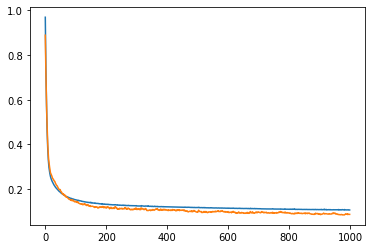

3/3 [==============================] - 0s 5ms/step - loss: 0.1000 - mape: 44.5682
loss = 0.0999971553683281
mape = 44.56816864013672


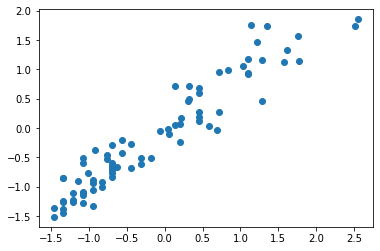

In [34]:
model = Sequential()
model.add(Input(9))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mse', metrics=['mape'])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, 
                    batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print('loss =', loss)
print('mape =', mape)

y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

# MNIST

## 데이터 준비

In [36]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [37]:
print(raw_train_x.shape, raw_train_y.shape)
print(raw_test_x.shape, raw_test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [38]:
#train_x의 첫 번째 원소 출력
np.set_printoptions(linewidth=4*29)
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

5


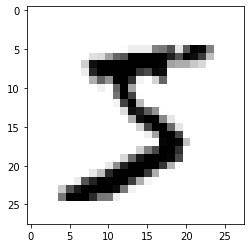

In [39]:
plt.imshow(raw_train_x[0], cmap=plt.cm.binary)
print(raw_train_y[0])

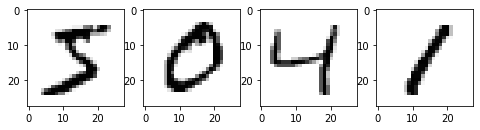

[5 0 4 1]


In [42]:
fig, axs = plt.subplots(1,4, figsize=(8,4))
for i in range(4):
  axs[i].imshow(raw_train_x[i], cmap=plt.cm.binary)
plt.show()
print(raw_train_y[:4])

## 데이터 정규화

In [43]:
print(np.max(raw_train_x[:,]))

255


In [45]:
x_max = np.max(raw_train_x[:,])

train_x = raw_train_x/x_max
test_x = raw_test_x/x_max

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))

1.0


In [46]:
train_x = train_x.reshape((-1, 28*28))
test_x = test_x.reshape((-1, 28*28))

print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


## 모델 학습

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


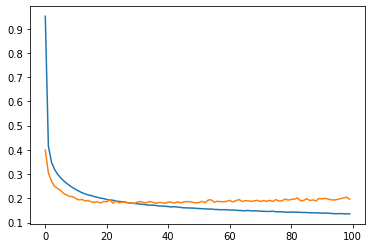

313/313 [==============================] - 1s 2ms/step - loss: 0.2099 - accuracy: 0.9427
loss = 0.20993725955486298
acc = 0.9427000284194946
[[1.2817894e-04 8.2413319e-11 9.2798735e-05 ... 9.9822634e-01 8.1688120e-07 1.0954712e-05]
 [4.9197426e-12 2.1632755e-05 9.9997580e-01 ... 4.9548089e-17 2.5129517e-11 7.2522293e-33]
 [3.5535879e-06 9.9737442e-01 7.8862289e-04 ... 2.3839354e-04 6.4926845e-04 1.7693327e-06]
 ...
 [8.0468320e-11 9.5029486e-13 7.4289098e-08 ... 1.0158583e-05 8.7250890e-05 1.9629279e-04]
 [6.7586457e-11 3.0324671e-13 7.1186474e-07 ... 1.6710995e-11 5.6107428e-06 1.3252322e-12]
 [1.2104511e-09 2.7726647e-16 1.8029503e-10 ... 7.5295983e-20 5.5256737e-12 3.1214525e-21]]
[7 2 1 ... 4 5 6]


In [49]:
model = Sequential()
model.add(Input(28*28))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

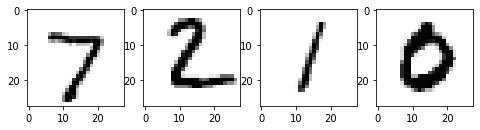

[7 2 1 0]


In [52]:
fig, axs = plt.subplots(1,4, figsize=(8,4))
for i in range(4):
  axs[i].imshow(raw_test_x[i], cmap=plt.cm.binary)
plt.show()
print(predicted[:4])

## Flatten 레이어 사용

reshape 필요 없음

In [53]:
x_max = np.max(raw_train_x[:,])

train_x = raw_train_x/x_max
test_x = raw_test_x/x_max

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))

1.0


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


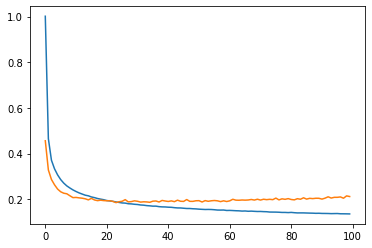

313/313 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.9361
loss = 0.24950063228607178
acc = 0.9361000061035156
[7 2 1 ... 4 5 6]


In [54]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

# 패션 MNIST

## 데이터 준비

In [55]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [56]:
print(raw_train_x.shape, raw_train_y.shape)
print(raw_test_x.shape, raw_test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [57]:
#train_x의 첫 번째 원소 출력
np.set_printoptions(linewidth=4*29)
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [59]:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

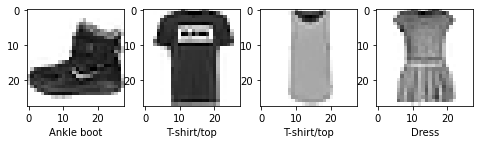

[9 0 0 3]


In [61]:
fig, axs = plt.subplots(1,4, figsize=(8,4))
for i in range(4):
  axs[i].imshow(raw_train_x[i], cmap=plt.cm.binary)
  axs[i].set_xlabel(class_names[raw_train_y[i]])
plt.show()
print(raw_train_y[:4])

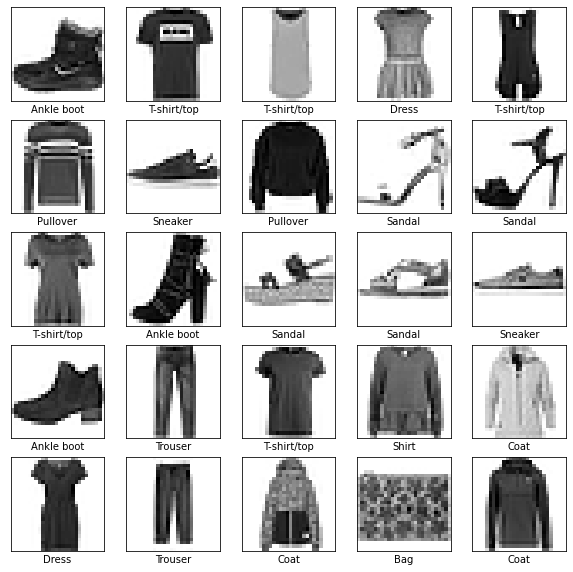

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[raw_train_y[i]])
plt.show()

## 데이터 정규화

In [64]:
print(np.max(raw_train_x[:,]))

255


In [65]:
x_max = np.max(raw_train_x[:,])

train_x = raw_train_x/x_max
test_x = raw_test_x/x_max

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))

1.0


In [66]:
print(train_x.shape)

(60000, 28, 28)


## 모델 학습

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


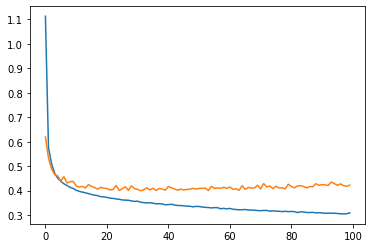

313/313 [==============================] - 1s 3ms/step - loss: 0.4381 - accuracy: 0.8526
loss = 0.4380740225315094
acc = 0.8525999784469604
[9 2 1 ... 8 1 5]


In [67]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

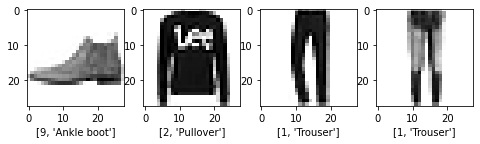

In [71]:
fig, axs = plt.subplots(1,4, figsize=(8,4))
for i in range(4):
  predicted_class_index = predicted[i]
  labels = [predicted_class_index, class_names[predicted_class_index]]
  axs[i].imshow(raw_test_x[i], cmap=plt.cm.binary)
  axs[i].set_xlabel(labels)
plt.show()

## 노드 더 많이

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


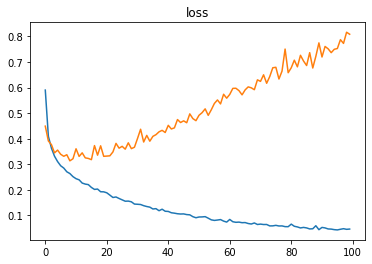

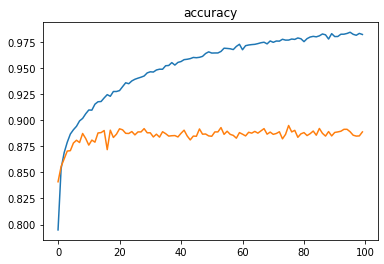

313/313 [==============================] - 1s 2ms/step - loss: 0.8102 - accuracy: 0.8885
loss = 0.8102153539657593
acc = 0.8884999752044678
[9 2 1 ... 8 1 5]


In [72]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

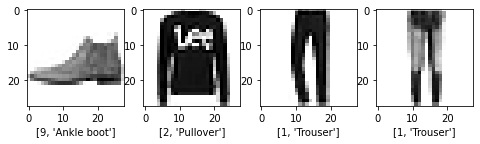

In [73]:
fig, axs = plt.subplots(1,4, figsize=(8,4))
for i in range(4):
  predicted_class_index = predicted[i]
  labels = [predicted_class_index, class_names[predicted_class_index]]
  axs[i].imshow(raw_test_x[i], cmap=plt.cm.binary)
  axs[i].set_xlabel(labels)
plt.show()

# 과대적합 방지

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 784)              0         
 se)                                                             
                                                                 
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)              

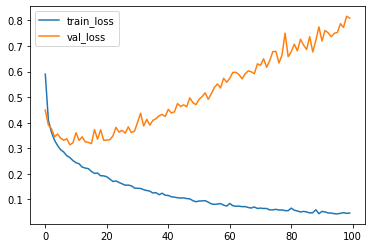

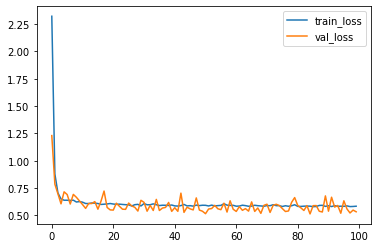

313/313 [==============================] - 1s 3ms/step - loss: 0.5563 - accuracy: 0.8337
loss = 0.5562732815742493
acc = 0.8337000012397766
[9 2 1 ... 8 1 5]


In [74]:
from tensorflow.keras.layers import Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(GaussianNoise(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history_of = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history_of.history['loss'], label='train_loss')
plt.plot(history_of.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


loss, acc = model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted)

# Callbacks

## 로스 실시간 출력 PlotLosses

In [77]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

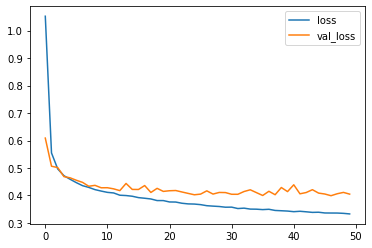

loss =  0.3328830599784851 , val_loss =  0.4048825204372406


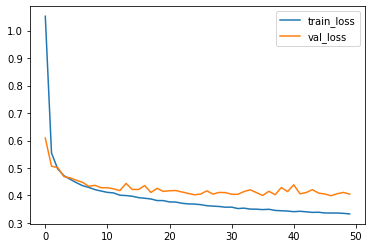

In [78]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

plot_losses = PlotLosses()

history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=128, validation_split=0.1,
                    callbacks=[plot_losses])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## 모델 저장 ModelCheckpoint

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________

Epoch 1: val_loss improved from inf to 0.58452, saving model to best_model.h5

Epoch 2: val_loss improved from 0.58452 to 0.50443, saving model to best_model.h5

Epoch 3: val_loss im

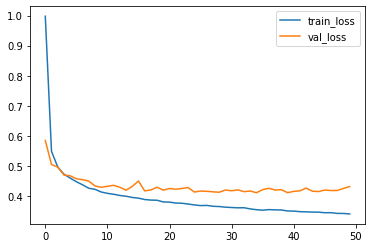

In [80]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=128, validation_split=0.1,
                    callbacks=[model_check_point])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [83]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')
best_model.summary()
loss, acc = best_model.evaluate(test_x, test_y)
print('loss =', loss)
print('acc =', acc)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.8510
loss = 0.4312136769294739
acc = 0.8510000109672546


## 조기 종료 EarlyStopping

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                7850      
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 29: early stopping


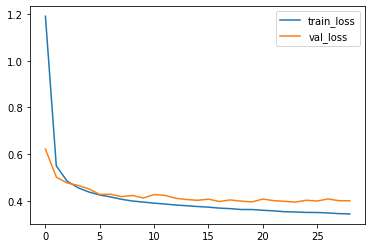

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=5)

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1,
                    callbacks=[early_stopping])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## 학습율 조정 ReduceLROnPlateau

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 10)                7850      
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


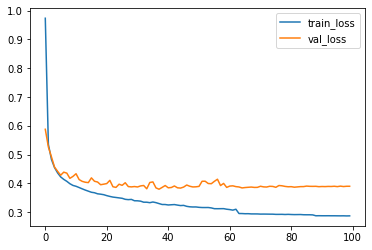

In [84]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=25, factor=0.2, min_learning_rate=0.00001)

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1,
                    callbacks=[reduce_lr])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## 학습율 조정 LearningRateScheduler

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 10)                7850      
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
learning rate changed at epoch 50 as 0.00010000000474974513


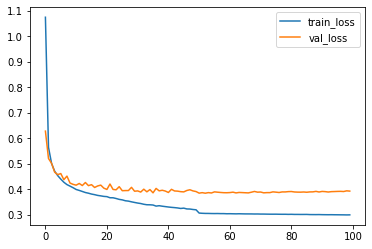

In [87]:
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

def scheduler(epoch, lr):
  if epoch == 50:
    lr = lr*0.1
    print('learning rate changed at epoch {} as {}'.format(epoch, lr))
  return lr

lr_scheduler = LearningRateScheduler(scheduler)

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=128, validation_split=0.1,
                    callbacks=[lr_scheduler])

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()